# Praca domowa 8
Paweł Wojciechowski

## Oryginalny wykres

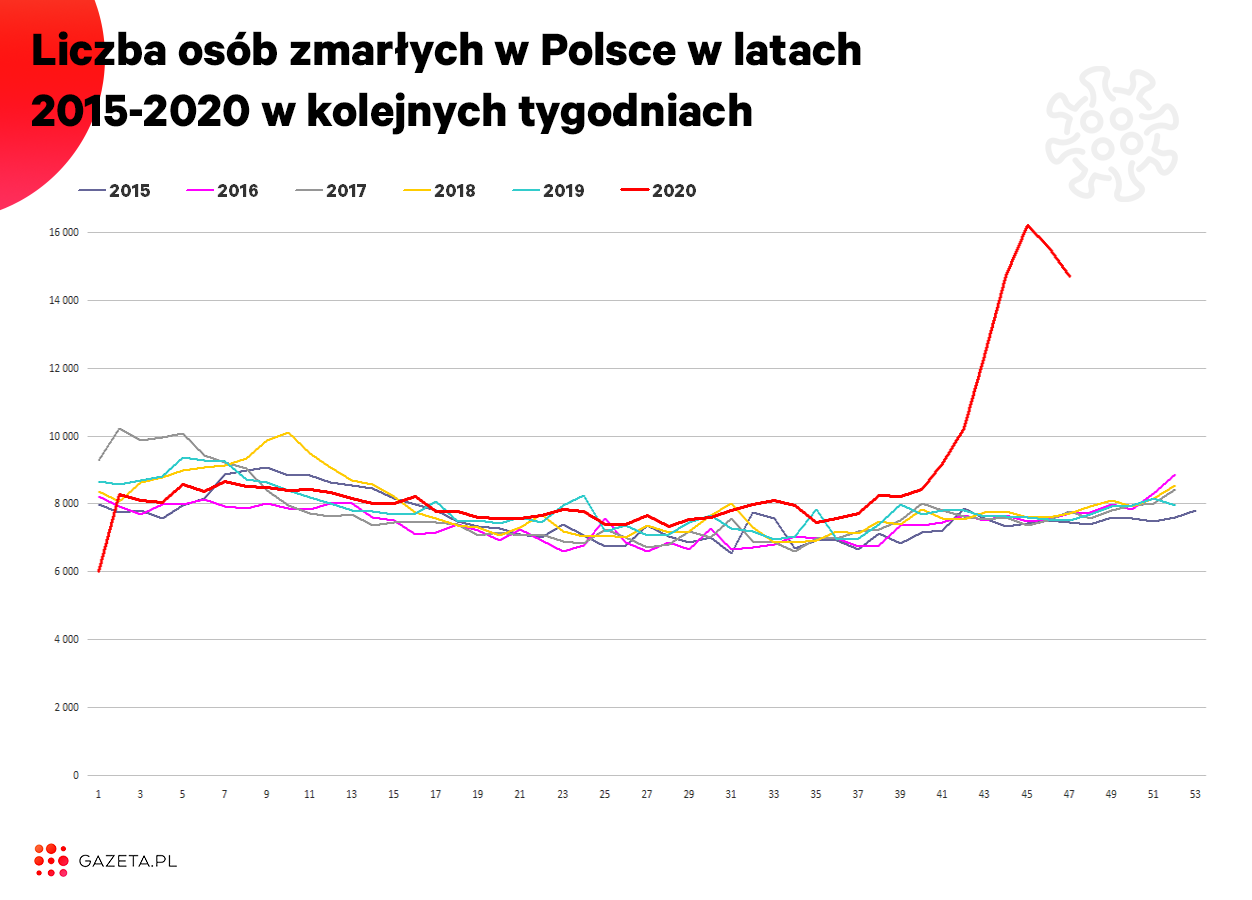

In [1]:
from IPython.display import Image
Image(filename='oryginalny.png', width=750) 

*żródło: https://next.gazeta.pl/next/7,151003,26564611,jeszcze-miesiac-przed-nami-a-juz-w-2020-r-w-polsce-zmarlo.html*

## Poprawiona wersja

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# wczytanie danych z lat 2010-2020
years = ['2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019', '2020']

dataframes = []
for year in years:
    df = pd.read_csv('dane/'+year+'.csv', delimiter=";", header=None)
    df = df.iloc[[6,9],3:].transpose()
    df.columns=['tydzien', 'zgony']
    df['tydzien'] = pd.to_numeric(df['tydzien'].replace("T0*", "", regex=True), downcast='integer')
    df['zgony'] = pd.to_numeric(df['zgony'].str.split().str.join(' ').replace(' ', '', regex=True), downcast='integer')
    dataframes.append(df)


In [4]:
# elementy legendy
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#AAAAAA', lw=3),
                Line2D([0], [0], color='red', lw=4)]


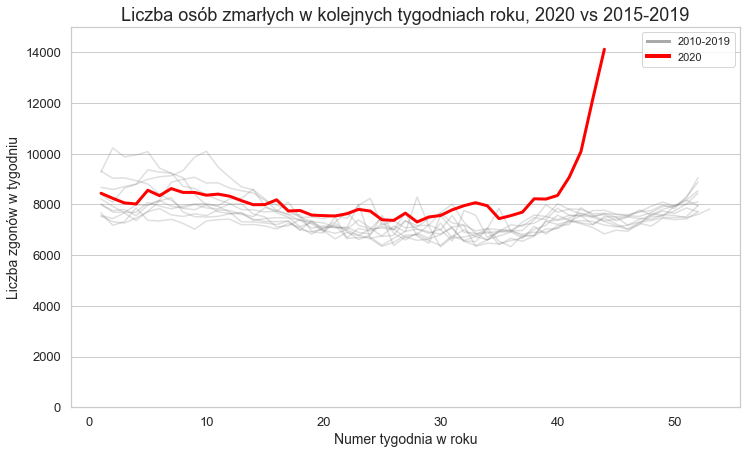

In [5]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style('whitegrid')
for i in range(len(dataframes)-1):
    sns.lineplot(data = dataframes[i], x = 'tydzien', y='zgony', color='grey', alpha=0.25)
    
ax = sns.lineplot(data = dataframes[len(dataframes)-1], x = 'tydzien', y='zgony', color='red', linewidth=3)
plt.ylim((0,15000))
ax.xaxis.grid(False)

plt.ylabel("Liczba zgonów w tygodniu", fontsize = 14)
plt.xlabel("Numer tygodnia w roku", fontsize = 14)
plt.title("Liczba osób zmarłych w kolejnych tygodniach roku, 2020 vs 2015-2019", fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
ax.legend(custom_lines, ['2010-2019', '2020'])
plt.show()

*żródło: https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/zgony-wedlug-tygodni,39,2.html*

### Co jest poprawione?
* Celem wykresu było porównanie roku 2020 do poprzednich lat, więc oznaczanie każdego roku innych kolorem jest zbędne i wprowadza tylko chaos (w tym przypadku nie ma potrzeby odróżnienia 2015 od 2016, co i tak byłoby bardzo ciężkie przy takim natłoku różnokolorowych wykresów na sobie). Dlatego rok 2020 jest oznaczonym wyróżniającym się czerwonym kolorem a pozostałe lata są oznaczone na szaro ze zmniejszoną przezroczystością aby nałożone na siebie w ładny sposób obrazowały trend poprzednich lat.
* Dzięki powyższemu, dodałem do wykresu lata 2010-2014.
* Powiększyłem zbyt małe oznaczenia osi

*Wykres dla 2020 w mojej wersji jest krótszy ponieważ najnowsze dane z GUSu (6.12.2020) sięgają 44 tygodnia.*